# 高德地图API调用

### - [点击进入github地址](https://github.com/G-2000/Amap-API-python/blob/master/README.md)
请先读readme文档

### ML/AI功能

- 静态地图和交通态势是含有计算机视觉功能
卫星返回图像，机器对图像进行实例分割，最后识别对象。所以能做到将不同的地点标识出来，或者分析出车辆多少和道路是否拥挤是否

- 路线规划、输入提示含有推荐算法
路线规划：可以推介最快速的线路
输入提示：可能使用协同过滤算法推荐

- 轨迹纠编、交通态势和天气查询含有语音识别
程序分析计算机提供的反馈，向用户反馈路线走错
程序识别声学信号、提取特征并且解码，以实现用户语音查询交通情况和天气状况的功能


### 设计应用

#### 特色食店店推荐应用

##### 简介：自由行旅者去到某个地方，也许想吃点有当地特色的食品，如长沙臭豆腐；
也许想试试网红店，如长沙茶颜悦色。
但是不知道哪里是最近最正宗最划算的
本应用会为旅者推荐个性化线路。

##### 使用API:
- IP定位:确定用户位置
- 地理围栏:寻找附近门店优惠信息
- 路线规划:规划最快路线

In [34]:
import requests
import json
import pandas as pd
key_me ="701465dbcf21793162e391fc67b7c9c6"
location="113.370026,22.522938"

## 轨迹纠编
- post方法
- 用于将行车产生的轨迹坐标点匹配到道路上。
- 参数需要置于body体之中

In [35]:



url_guiji = "https://restapi.amap.com/v4/grasproad/driving?key=701465dbcf21793162e391fc67b7c9c6"

payload =[{
      "x": 116.449429,
      "y": 40.014844,
      "sp": 4,
      "ag": 110,
      "tm": 1478831753
    },
    {
      "x": 116.449639,
      "y": 40.014776,
      "sp": 3,
      "ag": 110,
      "tm": 23
    },
    {
      "x": 116.449859,
      "y": 40.014716,
      "sp": 3,
      "ag": 111,
      "tm": 33
    },
    {
      "x": 116.450074,
      "y": 40.014658,
      "sp": 3,
      "ag": 110,
      "tm": 31
    },
    {
      "x": 116.450273,
      "y": 40.014598,
      "sp": 3,
      "ag": 111,
      "tm": 20
    }
]
#json.dumps转换为列表，post传输一定要用data
response = requests.post(url_guiji, data=json.dumps(payload))

data = response.json()

print(data)

{'data': {'distance': 33.0, 'points': [{'x': 116.44942000249563, 'y': 40.014843356125866}, {'x': 116.44945705955585, 'y': 40.01453960973057}]}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK', 'ext': None}


## 地理围栏
- post方法
- 地理围栏服务适用于需要针对特定区域，监控用户位置与区域关系的场景中。包括但不限于：

 - 签到打卡类场景，在用户打卡操作前，判断用户是否已经在对应的地理围栏区域内；
 - 共享单车类场景，当用户骑车离开合法使用区域时，第一时间获知；或当用户关锁支付时，判断用户是否停在了合法区域内；
 - 线下门店促销场景，当获取到用户定位在促销门店区域的附近时，向用户发送引导进入店铺的促销信息。

### 新增栅栏

In [199]:

url_weilan = 'https://restapi.amap.com/v4/geofence/meta?key=701465dbcf21793162e391fc67b7c9c6'
paylod = {
    "name": "中山公园",
    "center": "113.370139,22.523532",
    "radius": "1000",
    "enable": "true",
    "valid_time": "2020-05-19",
    "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
    "time": "00:00,11:59;13:00,20:59",
    "desc": "伟人故里中山公园",
    "alert_condition": "enter;leave"
}
response = requests.post(url_weilan, data = json.dumps(paylod))
data_create=response.json()
print(data_create)

{'data': {'gid': 'b709c49d-8ecd-4865-9d9f-03368c9811f2', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK', 'ext': None}


### 更新栅栏

In [211]:
url_cha = 'https://restapi.amap.com/v4/geofence/meta?key=701465dbcf21793162e391fc67b7c9c6'
paylod = {
    "name": "更新圆形围栏",
    "center": "116.328037,39.962379",
    "radius": "1148.8",
    "valid_time": "2020-06-30",
    "repeat": "Mon,Wed,Fri,Sat,Sun",
    "time": "07:00,12:00;15:00,21:00",
    "desc": "更新圆形围栏描述",
    "alert_condition": "enter"}

response = requests.post(url_cha, data=json.dumps(paylod))
data_cha = response.json()
print(data_cha)

{'data': {'gid': 'f68a9449-024d-478c-9aa6-36e453cac449', 'id': '0', 'message': '成功', 'status': '0'}, 'errcode': 0, 'errdetail': None, 'errmsg': 'OK', 'ext': None}


## 交通态势
- 用get获取
- 有圆形和矩形两种
- 目前支持城市：北京，上海，广州，深圳，宁波，武汉，重庆，成都，沈阳，南京，杭州，长春，常州，大连，东莞，福州，青岛，石家庄，天津，太原，西安，无锡，厦门，珠海，长沙，苏州，金华，佛山，济南，泉州，嘉兴，西宁，惠州，温州，中山，合肥，乌鲁木齐，台州，绍兴，昆明。

In [34]:
# 矩形区域
url_traffic = "https://restapi.amap.com/v3/traffic/status/rectangle?parameter"
params = {
    "key":"701465dbcf21793162e391fc67b7c9c6",
    "rectangle":"116.351147,39.966309;116.357134,39.968727"
}
response_traffic = requests.get(url_traffic,params=params)
data_traffic = response_traffic.json()
data_traffic

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：三元桥附近自东向西严重拥堵，安华桥附近自西向东行驶缓慢。',
  'evaluation': {'expedite': '73.33%',
   'congested': '20.00%',
   'blocked': '6.67%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## 输入提示
- get方法
- 在高德客户端的使用场景，输入“仙林”之后出现提示相关。

In [71]:
def notice(keywords:str):
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params ={
        'key':key_me,
        'keywords':keywords,
        'output':'json'
    }
    r = requests.get(url,params=params)
    data =r.json()
    return data


In [212]:
notice("中山市中山公园")

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B02F801E46',
   'name': '中山公园',
   'district': '广东省中山市',
   'adcode': '442000',
   'location': '113.370107,22.52352',
   'address': '孙文中路步行街',
   'typecode': '110101',
   'city': []},
  {'id': 'B02F80OS53',
   'name': '中山公园(南门)',
   'district': '广东省中山市',
   'adcode': '442000',
   'location': '113.371362,22.522381',
   'address': '公园大道',
   'typecode': '991400',
   'city': []},
  {'id': 'BV10259400',
   'name': '中山公园北门(公交站)',
   'district': '广东省中山市',
   'adcode': '442000',
   'location': '113.371727,22.526207',
   'address': '018路;035路;209路',
   'typecode': '150700',
   'city': []},
  {'id': 'B02F8007DF',
   'name': '紫马岭公园',
   'district': '广东省中山市',
   'adcode': '442000',
   'location': '113.411095,22.507851',
   'address': '博爱六路',
   'typecode': '110101',
   'city': []},
  {'id': 'B0FFH1GBOL',
   'name': '中山公园-四角亭',
   'district': '广东省中山市',
   'adcode': '442000',
   'location': '113.368966,22.524099'

## 天气查询
- GET方式

In [82]:
#base返回实况天气
#all返回预报天气
def weather(city,choice)->str:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params ={
        'key':key_me,
        'city':city,
        'extensions':choice,
        'output':'json'
    }
    r = requests.get(url,params=params)
    data =r.json()
    return data


In [83]:
weather("中山","all")

{'status': '1',
 'count': '2',
 'info': 'OK',
 'infocode': '10000',
 'forecasts': [{'city': '中山区',
   'adcode': '210202',
   'province': '辽宁',
   'reporttime': '2020-04-22 17:23:39',
   'casts': [{'date': '2020-04-22',
     'week': '3',
     'dayweather': '晴',
     'nightweather': '晴',
     'daytemp': '11',
     'nighttemp': '6',
     'daywind': '西北',
     'nightwind': '西北',
     'daypower': '6',
     'nightpower': '6'},
    {'date': '2020-04-23',
     'week': '4',
     'dayweather': '晴',
     'nightweather': '晴',
     'daytemp': '14',
     'nighttemp': '8',
     'daywind': '西',
     'nightwind': '西',
     'daypower': '6',
     'nightpower': '6'},
    {'date': '2020-04-24',
     'week': '5',
     'dayweather': '晴',
     'nightweather': '多云',
     'daytemp': '18',
     'nighttemp': '8',
     'daywind': '西南',
     'nightwind': '西南',
     'daypower': '6',
     'nightpower': '6'},
    {'date': '2020-04-25',
     'week': '6',
     'dayweather': '晴',
     'nightweather': '晴',
     'daytemp':

## 坐标转换
- get方法
- 坐标转换是一类简单的HTTP接口，能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。

In [85]:
#可选值：gps;mapbar;baidu;autonavi(不进行转换)
def trans(locations,coordsys):
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params ={
        'key':key_me,
        'locations':locations,
        'coordsys':coordsys,
        'output':'json'
    }
    r = requests.get(url,params=params)
    data =r.json()
    return data


In [86]:
trans("113.370026,22.522938","baidu")

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '113.363518793468,22.517054239616'}

## 静态地图
- get方式
- 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形

In [150]:
from PIL import Image
from io import BytesIO
# zoom:地图缩放级别:[1,17]
def trans(location,zoom,labels=None):
    url = "https://restapi.amap.com/v3/staticmap?parameters"
    params ={
        "key":key_me,
        "location":location,
        "zoom":zoom,
        "labels":labels,
        "output":"json"
    }
    r = requests.get(url,params=params)
    data =Image.open(BytesIO(r.content))
    return data

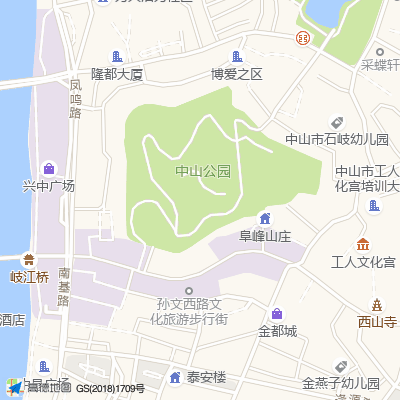

In [151]:
trans(location="113.370026,22.522938",zoom="15")

## 批量请求接口
- post方法
- batch接口本身为post请求接口，子请求只支持get方式请求，以json形式返回数据结构；子请求参数请参考各接口文档进行拼接，如无特殊声明，接口的输入参数和输出数据编码全部统一为UTF-8；
- 默认所有的子请求都会继承当前请求的header头；

In [153]:
url_batch = "https://restapi.amap.com/v3/batch?key=701465dbcf21793162e391fc67b7c9c6"
paylod = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=701465dbcf21793162e391fc67b7c9c6&location=113.370026,22.522938&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=701465dbcf21793162e391fc67b7c9c6&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]
}
headers = {'content-type': "application/json"}
response = requests.post(url_batch, data=json.dumps(paylod), headers=headers)
data_batch = response.json()
print(data_batch)


[{'status': 200, 'body': {'suggestion': {'keywords': {}, 'cities': {}}, 'info': 'OK', 'status': '1', 'count': '823', 'pois': [{'typecode': '080501', 'adname': '中山市', 'biz_type': {}, 'id': 'B0FFH1INFW', 'pname': '广东省', 'importance': {}, 'parent': 'B02F801E46', 'location': '113.368966,22.522772', 'distance': '110', 'tel': {}, 'biz_ext': {'rating': {}, 'cost': {}}, 'shopid': {}, 'address': {}, 'poiweight': {}, 'cityname': '中山市', 'photos': {}, 'type': '体育休闲服务;休闲场所;游乐场', 'shopinfo': '0', 'name': '中山公园-儿童游乐场', 'childtype': '302'}, {'typecode': '080104', 'adname': '中山市', 'biz_type': {}, 'id': 'B0FFH1KUNF', 'pname': '广东省', 'importance': {}, 'parent': 'B02F801E46', 'location': '113.371038,22.523637', 'distance': '129', 'tel': {}, 'biz_ext': {'rating': {}, 'cost': {}}, 'shopid': {}, 'address': '石岐区街道凤鸣路中山公园', 'poiweight': {}, 'cityname': '中山市', 'photos': {}, 'type': '体育休闲服务;运动场馆;篮球场馆', 'shopinfo': '0', 'name': '中山公园-篮球场', 'childtype': '302'}, {'typecode': '080300', 'adname': '中山市', 'biz_type': {

In [154]:
pd_batch = pd.json_normalize(data_batch)
pd_batch

,status,body.info,body.status,body.count,body.pois,body.infocode,header.gsid,header.Vary,header.Content-Type,header.Access-Control-Allow-Methods,header.Access-Control-Allow-Origin,header.sc,header.Content-Length,header.Access-Control-Allow-Headers,header.X-Powered-By
0,200,OK,1,823,"[{'typecode': '080501', 'adname': '中山市', 'biz_...",10000,011132093008158755055146300021888577135,Accept-Encoding,application/json;charset=UTF-8,*,*,0.112,6006,"DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Req...",ring/1.0.0
1,200,OK,1,878,"[{'typecode': '080000', 'adname': '曹妃甸区', 'biz...",10000,011132093008158755055146300021888577135,Accept-Encoding,application/json;charset=UTF-8,*,*,0.140,5564,"DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Req...",ring/1.0.0


In [155]:
# list indices must be integers or slices, not str 列表必须是整数或是片而不是字符，因为我这里的datas中有很多的dict,所以取不到对应的键值对.
pd_batch_basic = pd.json_normalize(data_batch[0]['body']['pois'])
pd_batch_basic

,typecode,adname,id,pname,parent,location,distance,cityname,type,shopinfo,name,childtype,address,photos,biz_ext.rating,tel
0,080501,中山市,B0FFH1INFW,广东省,B02F801E46,"113.368966,22.522772",110,中山市,体育休闲服务;休闲场所;游乐场,0,中山公园-儿童游乐场,302,NaN,NaN,NaN,NaN
1,080104,中山市,B0FFH1KUNF,广东省,B02F801E46,"113.371038,22.523637",129,中山市,体育休闲服务;运动场馆;篮球场馆,0,中山公园-篮球场,302,石岐区街道凤鸣路中山公园,NaN,NaN,NaN
2,080300,中山市,B0FFK9N68Z,广东省,NaN,"113.370482,22.521825",132,中山市,体育休闲服务;娱乐场所;娱乐场所,0,愉乐圈公仔屋,NaN,孙文西路与步行街交叉口西100米,[{'url': 'http://store.is.autonavi.com/showpic...,3.5,NaN
3,080304,中山市,B0FFLAQDV5,广东省,NaN,"113.368365,22.521034",272,中山市,体育休闲服务;娱乐场所;酒吧,1,PM Bar,NaN,石岐区南基横街2-4号1-3层一层第一卡,[{'url': 'http://store.is.autonavi.com/showpic...,NaN,NaN
4,141400|080300,中山市,B0FFGBAKPY,广东省,NaN,"113.367404,22.523682",282,中山市,科教文化服务;培训机构;培训机构|体育休闲服务;娱乐场所;娱乐场所,0,飞炫舞蹈生活馆,NaN,石岐区凤鸣路88号二楼(兴中广场对面),[{'url': 'http://store.is.autonavi.com/showpic...,NaN,0760-88878986;18300108682
5,080308,中山市,B0FFGYAWAO,广东省,B02F8018EV,"113.367407,22.522065",286,中山市,体育休闲服务;娱乐场所;网吧,0,爱尚网咖(中天广场店),202,凤鸣路2号中天广场4层,[{'url': 'http://store.is.autonavi.com/showpic...,4.3,13829780513
6,080308,中山市,B0FFH1WZDO,广东省,NaN,"113.367406,22.522008",288,中山市,体育休闲服务;娱乐场所;网吧,0,网咖,NaN,市巷与孙文西路文化旅游步行街交叉口南50米,NaN,0.0,NaN
7,080100,中山市,B0FFLG4789,广东省,B02F802UBE,"113.366849,22.522760",327,中山市,体育休闲服务;运动场馆;运动场所,0,梦幻星空馆,202,石岐区街道凤鸣路3号中兴广场B1卸货区货递上来三楼,NaN,NaN,NaN
8,080501,中山市,B0FFMC9SU1,广东省,NaN,"113.366867,22.522401",330,中山市,体育休闲服务;休闲场所;游乐场,0,乐行儿童乐园,NaN,石岐区凤鸣路3号兴中广场B1座三楼01-07号,NaN,NaN,NaN
9,080000,中山市,B0FFLD079S,广东省,B02F802UBE,"113.366795,22.522744",332,中山市,体育休闲服务;体育休闲服务场所;体育休闲服务场所,0,巴巴扬共享琴房(兴中广场),202,凤鸣路3号兴中广场中央广场及星巴克旁,NaN,NaN,NaN


## IP定位
- get方法

In [158]:

def trans(ip=None):
    url = "https://restapi.amap.com/v3/ip?parameters"
    params ={
        "key":key_me,
        "ip":ip,
        "output":"json"
    }
    r = requests.get(url,params=params)
    data =r.json()
    return data    

In [159]:
trans()

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '广州市',
 'adcode': '440100',
 'rectangle': '113.1017375,22.93212254;113.6770499,23.3809537'}

## 搜索POI
- get方法
- 提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。
 - 关键字搜索：通过用POI的关键字进行条件搜索，例如：肯德基、朝阳公园等；同时支持设置POI类型搜索，例如：银行
 - 周边搜索：在用户传入经纬度坐标点附近，在设定的范围内，按照关键字或POI类型搜索；
 - 多边形搜索：在多边形区域内进行搜索
 - ID查询：通过POI ID，查询某个POI详情，建议可同输入提示API配合使用

In [162]:
def search(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_me,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data 

In [164]:
search("|美食")

{'status': '0', 'info': 'INVALID_PARAMS', 'infocode': '20000'}

## 行政区域查询
- get方法
- 目前部分城市和省直辖县因为没有区县的概念，故在市级下方直接显示街道。例如：广东-东莞、海南-文昌市。
街道级别是不能返回边界数据polyline的，乡镇街道级别返回的adcode是所属区县的adcode。

In [198]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_me,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict=2)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_中山市 = pd.json_normalize(行政区域["districts"][0]['districts'][21]['districts'])
display(df_行政区域_1级,df_行政区域_2级_中山市)


,citycode,adcode,name,center,level,districts
0,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440404', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440881', 'nam..."
7,0750,440700,江门市,"113.094942,22.590431",city,"[{'citycode': '0750', 'adcode': '440784', 'nam..."
8,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
9,0668,440900,茂名市,"110.919229,21.659751",city,"[{'citycode': '0668', 'adcode': '440983', 'nam..."


,citycode,adcode,name,center,level,districts
0,0760,442000,三角镇,"113.416,22.7079",street,[]
1,0760,442000,横栏镇,"113.224,22.6048",street,[]
2,0760,442000,五桂山街道,"113.399,22.4847",street,[]
3,0760,442000,东升镇,"113.321,22.5607",street,[]
4,0760,442000,神湾镇,"113.376,22.2768",street,[]
5,0760,442000,火炬开发区街道,"113.42,22.5577",street,[]
6,0760,442000,小榄镇,"113.23,22.7026",street,[]
7,0760,442000,南朗镇,"113.482,22.519",street,[]
8,0760,442000,古镇镇,"113.167,22.6751",street,[]
9,0760,442000,民众镇,"113.499,22.6855",street,[]


## 路线规划
- get方法

### 驾车路线规划
- 驾车路径规划 API 可以规划以小客车、轿车通勤出行的方案，并且返回通勤方案的数据。

In [196]:
def car(origin,destination,extensions='base',strategy=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/driving?parameters'
    params={
        'key':key_me,
        'origin':origin,
        'destination':destination,
        'extensions':extensions,
        'strategy':strategy,
        
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


中山公园_car = car("113.370139,22.523532","113.363455,22.516967",extensions='all')
print(中山公园_car)
df_car = pd.json_normalize(中山公园_car["route"]["paths"])
df_car

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'route': {'origin': '113.370139,22.523532', 'destination': '113.363455,22.516967', 'taxi_cost': '9', 'paths': [{'distance': '2393', 'duration': '841', 'strategy': '速度最快', 'tolls': '0', 'toll_distance': '0', 'steps': [{'instruction': '沿湖山路向东北行驶246米左转', 'orientation': '东北', 'road': '湖山路', 'distance': '246', 'tolls': '0', 'toll_distance': '0', 'toll_road': [], 'duration': '94', 'polyline': '113.371048,22.524405;113.371147,22.524353;113.371239,22.524336;113.371307,22.524349;113.371544,22.524523;113.371574,22.52457;113.371582,22.524645;113.371651,22.524736;113.37207,22.525251;113.372589,22.525898', 'action': '左转', 'assistant_action': [], 'tmcs': [{'lcode': [], 'distance': '66', 'status': '未知', 'polyline': '113.371048,22.524405;113.371147,22.524353;113.371239,22.524336;113.371307,22.524349;113.371544,22.524523;113.371574,22.52457'}, {'lcode': [], 'distance': '20', 'status': '未知', 'polyline': '113.371574,22.52457;113.371582,22.5

,distance,duration,strategy,tolls,toll_distance,steps,restriction,traffic_lights
0,2393,841,速度最快,0,0,"[{'instruction': '沿湖山路向东北行驶246米左转', 'orientati...",0,4


## 地理/逆地理编码
- 结构化地址的定义： 首先，地址肯定是一串字符，内含国家、省份、城市、区县、城镇、乡村、街道、门牌号码、屋邨、大厦等建筑物名称。按照由大区域名称到小区域名称组合在一起的字符。一个有效的地址应该是独一无二的。注意：针对大陆、港、澳地区的地理编码转换时可以将国家信息选择性的忽略，但省、市、城镇等级别的地址构成是不能忽略的。暂时不支持返回台湾省的详细地址信息。

### 地理编码

In [185]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_me,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


中山公园 = geocode(address='广东省中山市中山公园')
print(中山公园)
df_中山公园地理编码 = pd.json_normalize(中山公园['geocodes'])
display(df_中山公园地理编码)
中山公园地理编码 = 中山公园['geocodes'][0]['location']
print("中山公园地理编码:",中山公园地理编码)

岐江公园 = geocode(address='广东省中山市岐江公园')
print(岐江公园)
df_岐江公园地理编码 = pd.json_normalize(岐江公园['geocodes'])
display(df_岐江公园地理编码)
岐江公园地理编码 = 岐江公园['geocodes'][0]['location']
print("岐江公园地理编码:",岐江公园地理编码)


{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省中山市中山公园', 'country': '中国', 'province': '广东省', 'citycode': '0760', 'city': '中山市', 'district': [], 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '442000', 'street': [], 'number': [], 'location': '113.370139,22.523532', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省中山市中山公园,中国,广东省,0760,中山市,[],[],442000,[],[],"113.370139,22.523532",兴趣点,[],[],[],[]


中山公园地理编码: 113.370139,22.523532
{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省中山市岐江公园', 'country': '中国', 'province': '广东省', 'citycode': '0760', 'city': '中山市', 'district': [], 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '442000', 'street': [], 'number': [], 'location': '113.363455,22.516967', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省中山市岐江公园,中国,广东省,0760,中山市,[],[],442000,[],[],"113.363455,22.516967",兴趣点,[],[],[],[]


岐江公园地理编码: 113.363455,22.516967


### 逆地理编码

In [181]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_me,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

中山公园逆地理编码_base = regeocode(中山公园地理编码)
print(中山公园逆地理编码_base)
df_中山公园逆地理编码 = pd.json_normalize(中山公园逆地理编码_base).T
display(df_中山公园逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '中山市', 'province': '广东省', 'adcode': '442000', 'district': [], 'towncode': '442000001000', 'streetNumber': {'number': '94号', 'location': '113.37054,22.5220419', 'direction': '南', 'distance': '170.734', 'street': '孙文西路'}, 'country': '中国', 'township': '石岐区街道', 'businessAreas': [[]], 'building': {'name': '中山公园', 'type': '风景名胜;公园广场;公园'}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0760'}, 'formatted_address': '广东省中山市石岐区街道中山公园'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,中山市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,442000
regeocode.addressComponent.district,[]
regeocode.addressComponent.towncode,442000001000
regeocode.addressComponent.streetNumber.number,94号
regeocode.addressComponent.streetNumber.location,"113.37054,22.5220419"
